<a href="https://colab.research.google.com/github/pragyapandey2804/fake_and_real_news/blob/main/fake_and_real_news.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

LOADING DATASET

In [4]:
!pip install opendatasets
!pip install pandas

In [6]:
import opendatasets as od
import pandas

od.download(
	"https://www.kaggle.com/datasets/clmentbisaillon/fake-and-real-news-dataset")


Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: pragya2804
Your Kaggle Key: ··········
Dataset URL: https://www.kaggle.com/datasets/clmentbisaillon/fake-and-real-news-dataset


100%|██████████| 41.0M/41.0M [00:02<00:00, 19.4MB/s]


In [7]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All"
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

**DATA ANALYSIS AND VISUALISATION **

In [8]:
#loading the data
fake = pd.read_csv("fake-and-real-news-dataset/Fake.csv")
true = pd.read_csv("fake-and-real-news-dataset/True.csv")

In [9]:
#fetching how the data looks like
fake.head()

,title,text,subject,date
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017"
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017"
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017"
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017"
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017"


In [10]:
#checking different columns and their count
fake["subject"].value_counts()

,count
subject,
News,9050
politics,6841
left-news,4459
Government News,1570
US_News,783
Middle-east,778


In [11]:
true.head()

,title,text,subject,date
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017"
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017"
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017"
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017"
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017"


In [12]:
#checking different columns and their count
true["subject"].value_counts()

,count
subject,
politicsNews,11272
worldnews,10145


In [13]:
#creating a category for whether fake or not
fake["category"] = 1
true["category"] = 0

In [14]:
fake.head()

,title,text,subject,date,category
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017",1
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017",1
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017",1
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017",1
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017",1


In [15]:
true.head()

,title,text,subject,date,category
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017",0
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017",0
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017",0
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017",0
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017",0


In [16]:
#joining the two data frames and reseting the index
df = pd.concat([fake, true]).reset_index(drop=True)

In [17]:
df.head()

,title,text,subject,date,category
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017",1
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017",1
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017",1
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017",1
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017",1


In [18]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

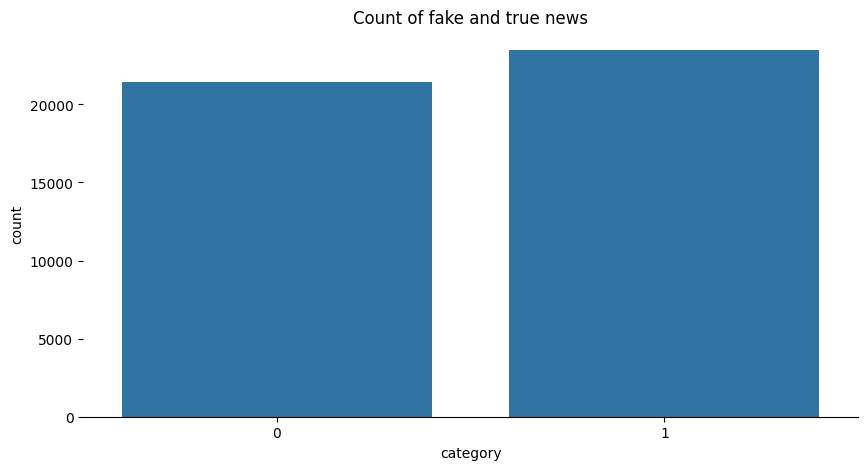

In [19]:
fig = plt.figure(figsize=(10,5))
graph = sns.countplot(x="category", data=df)
plt.title("Count of fake and true news")
#removing boundaries
graph.spines["right"].set_visible(False)
graph.spines["left"].set_visible(False)
graph.spines["top"].set_visible(False)

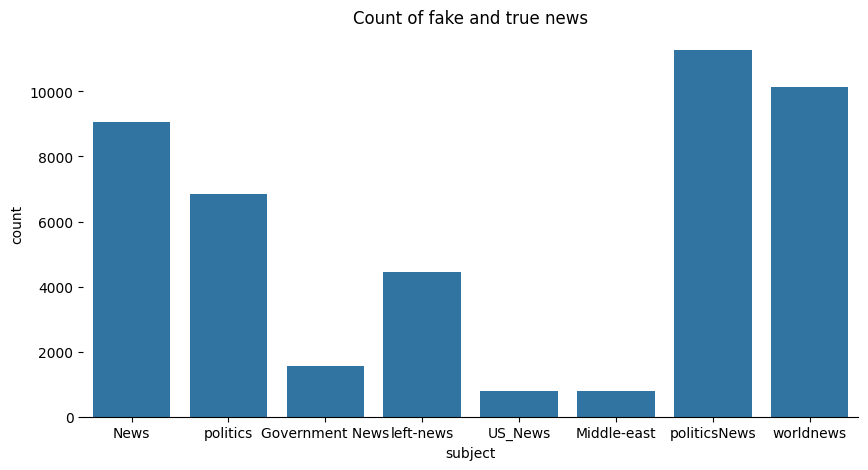

In [20]:
fig = plt.figure(figsize=(10,5))
graph = sns.countplot(x="subject", data=df)
plt.title("Count of fake and true news")
#removing boundaries
graph.spines["right"].set_visible(False)
graph.spines["left"].set_visible(False)
graph.spines["top"].set_visible(False)

In [21]:
df = df[["text","category"]]

In [22]:
df.head()

,text,category
0,Donald Trump just couldn t wish all Americans ...,1
1,House Intelligence Committee Chairman Devin Nu...,1
2,"On Friday, it was revealed that former Milwauk...",1
3,"On Christmas day, Donald Trump announced that ...",1
4,Pope Francis used his annual Christmas Day mes...,1


**DATA CLEANING AND NORMALIZATION **

In [23]:
df.isna().sum()*100/len(df)  #finding missing values in percentage

,0
text,0.0
category,0.0


In [24]:
blanks = [] #checking for empty strings
#index, label and review of the doc
for index,text in df['text'].items(): #iter through index,label and review
    if text.isspace(): #check for spaces
        blanks.append(index) # noted down in blanks list
len(blanks)

631

In [25]:
blanks

[10923,
 11041,
 11190,
 11225,
 11236,
 11241,
 11247,
 11249,
 11267,
 11268,
 11283,
 11284,
 11285,
 11289,
 11290,
 11292,
 11295,
 11296,
 11301,
 11303,
 11304,
 11305,
 11309,
 11314,
 11317,
 11319,
 11322,
 11330,
 11334,
 11335,
 11340,
 11343,
 11348,
 11351,
 11352,
 11357,
 11371,
 11373,
 11374,
 11382,
 11397,
 11402,
 11403,
 11409,
 11410,
 11412,
 11415,
 11419,
 11421,
 11427,
 11431,
 11432,
 11440,
 11448,
 11450,
 11453,
 11462,
 11464,
 11465,
 11472,
 11473,
 11475,
 11478,
 11489,
 11491,
 11493,
 11494,
 11501,
 11505,
 11507,
 11520,
 11531,
 11532,
 11533,
 11538,
 11542,
 11547,
 11549,
 11551,
 11559,
 11563,
 11581,
 11585,
 11589,
 11590,
 11614,
 11624,
 11625,
 11627,
 11631,
 11636,
 11637,
 11643,
 11650,
 11658,
 11661,
 11672,
 11679,
 11681,
 11684,
 11686,
 11688,
 11692,
 11708,
 11718,
 11729,
 11739,
 11753,
 11765,
 11768,
 11777,
 11782,
 11786,
 11788,
 11792,
 11793,
 11803,
 11806,
 11813,
 11821,
 11831,
 11832,
 11841,
 11844,
 11848,


In [26]:
df.shape

(44898, 2)

In [27]:
df.drop(blanks,inplace=True)

In [28]:
df.shape

(44267, 2)

In [29]:
from nltk.corpus import stopwords
from nltk.corpus import wordnet
from nltk.stem import WordNetLemmatizer
import spacy
import re
nlp = spacy.load("en_core_web_sm")

In [30]:
lema = WordNetLemmatizer()

In [31]:
# Downloads the data.
import nltk
nltk.download('stopwords')


# Using the stopwords.
from nltk.corpus import stopwords

# Initialize the stopwords
stoplist = stopwords.words('english')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [32]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [33]:
import nltk
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In [34]:
#stopwords for spacy
list1 = nlp.Defaults.stop_words
print(len(list1))

#stopwords for NLTK
list2 = stopwords.words("english")
print(len(list2))

#combining the stopword list
Stopwords = set((set(list1)|set(list2)))
print(len(Stopwords))

326
179
382


In [35]:
import re
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

# Initialize stopwords and lemmatizer
Stopwords = set(stopwords.words('english'))
lema = WordNetLemmatizer()

def clean_text(text):
    string = ""
    # Lower casing
    text = text.lower()

    # Simplifying text
    text = re.sub(r"i'm", "i am", text)
    text = re.sub(r"he's", "he is", text)
    text = re.sub(r"she's", "she is", text)
    text = re.sub(r"that's", "that is", text)
    text = re.sub(r"what's", "what is", text)
    text = re.sub(r"where's", "where is", text)
    text = re.sub(r"\'ll", "will", text)
    text = re.sub(r"\'ve", "have", text)
    text = re.sub(r"\'re", "are", text)
    text = re.sub(r"\'d", "would", text)
    text = re.sub(r"won't", "will not", text)
    text = re.sub(r"can't", "cannot", text)

    # Removing special characters but preserving spaces
    text = re.sub(r"[-()\"!#$@%^&*{}?.,:]+", " ", text)  # Replace special chars with spaces
    text = re.sub(r"\s+", " ", text)  # Replace multiple spaces with a single space

    # Remove non-alphanumeric characters but keep spaces
    text = re.sub(r"[^A-Za-z0-9\s]", "", text)

    # Lemmatize and remove stopwords
    for word in text.split():
        if word not in Stopwords:
            string += lema.lemmatize(word) + " "

    return string.strip()  # Remove any trailing space


In [36]:
df["text"][10]

"A centerpiece of Donald Trump s campaign, and now his presidency, has been his white supremacist ways. That is why so many of the public feuds he gets into involve people of color. One of his favorite targets, is, of course, the players in the National Football League who dare to exercise their First Amendment rights by kneeling during the national anthem in protest of racist police brutality. Well, there is one person who has figured out that racism is bad for business, even if it did get the orange overlord elected: The founder of the pizza chain Papa John s.This is a man who has never been on the right side of history on any number of issues, and plus his pizza sucks. But, when he decided to complain about the players protesting, his sales really dropped. Turns out racism doesn t pay, and we all know that corporations are all about the bottom line. Therefore, Papa John Schnatter will no longer be CEO of the hack pizza chain.BREAKING: Papa John's founder John Schnatter to step down 

In [37]:
clean_text(df['text'][10])

'centerpiece donald trump campaign presidency white supremacist way many public feud get involve people color one favorite target course player national football league dare exercise first amendment right kneeling national anthem protest racist police brutality well one person figured racism bad business even get orange overlord elected founder pizza chain papa john man never right side history number issue plus pizza suck decided complain player protesting sale really dropped turn racism pay know corporation bottom line therefore papa john schnatter longer ceo hack pizza chain breaking papa john founder john schnatter step ceo announcement come week criticized nfl protest ap business news apbusiness december 21 2017the thing people certainly allowed political opinion realize opinion often come dire consequence especially one business trying garner sale support people one would presume goal ceo one know whether pressure shareholder public outcry boycott even nfl anything stepping right

In [38]:
df["text"] = df["text"].apply(clean_text)

In [39]:
df["text"]

,text
0,donald trump wish american happy new year leav...
1,house intelligence committee chairman devin nu...
2,friday revealed former milwaukee sheriff david...
3,christmas day donald trump announced would bac...
4,pope francis used annual christmas day message...
...,...
44893,brussels reuters nato ally tuesday welcomed pr...
44894,london reuters lexisnexis provider legal regul...
44895,minsk reuters shadow disused soviet era factor...
44896,moscow reuters vatican secretary state cardina...


**WORD CLOUD**

In [40]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

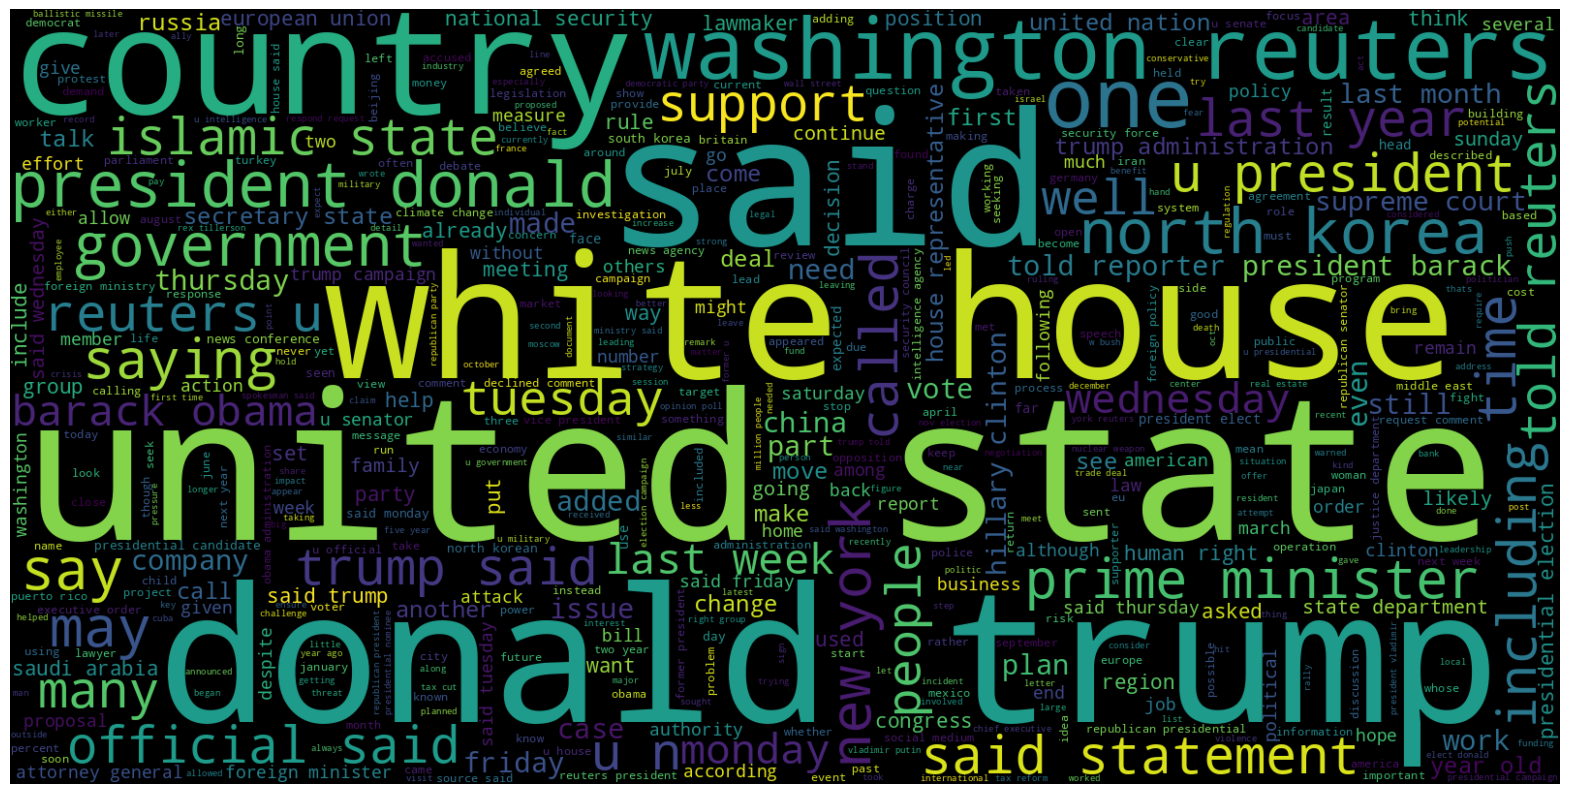

In [41]:
#True News
plt.figure(figsize=(20,20))
Wc = WordCloud(max_words=500, width=1600, height=800).generate(" ".join(df[df.category==0]["text"]))
plt.axis("off")
plt.imshow(Wc, interpolation='bilinear')


**MODEL BUILDING**

In [50]:
from sklearn.model_selection import train_test_split
X = df["text"] #feature
y = df["category"] #target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [51]:
#TFIDF vectoriser
from sklearn.feature_extraction.text import TfidfVectorizer
vectoriser = TfidfVectorizer(max_df=0.5)
X_train_tfidf = vectoriser.fit_transform(X_train)
X_test_tfidf = vectoriser.transform(X_test)

In [52]:
X_train_tfidf

<29658x99216 sparse matrix of type '<class 'numpy.float64'>'
	with 4790136 stored elements in Compressed Sparse Row format>

In [53]:
from sklearn.svm import LinearSVC
clf = LinearSVC()
clf.fit(X_train_tfidf,y_train)

LinearSVC()

In [54]:
from sklearn.pipeline import Pipeline
text_clf = Pipeline([('tfidf',TfidfVectorizer()),('clf',LinearSVC())])
text_clf.fit(X_train,y_train)

Pipeline(steps=[('tfidf', TfidfVectorizer()), ('clf', LinearSVC())])

In [55]:
predictions = text_clf.predict(X_test)

In [56]:
from sklearn import metrics
print(metrics.classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      7047
           1       1.00      0.99      0.99      7562

    accuracy                           0.99     14609
   macro avg       0.99      0.99      0.99     14609
weighted avg       0.99      0.99      0.99     14609



In [57]:
print(metrics.accuracy_score(y_test,predictions))

0.9947977274282976


In [58]:
print(metrics.confusion_matrix(y_test,predictions))

[[7010   37]
 [  39 7523]]
